In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pywaffle import Waffle

# Waffle Charts

In [56]:
df_canada = pd.read_csv('d:/datasets/canadian_immegration_data.csv')

In [3]:
data = df_canada.groupby('Country').sum().sort_values(by='Total', ascending=False).transpose().reset_index().drop(columns=['index']).iloc[-1,:]

In [4]:
data[:5]

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: 34, dtype: int64

In [5]:
labels=list(data[:5].keys())

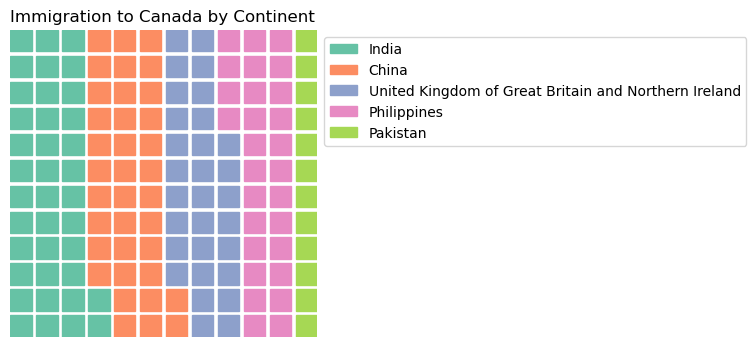

In [6]:
# Create a waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=12,     # Number of rows in the grid
    columns=12,  # Number of columns in the grid
    values=dict(data[:5]), # Data for each category
    title={'label': 'Immigration to Canada by Continent', 'loc': 'left'},
    legend={'labels': labels, 'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

plt.show()

# Word Clouds

In [67]:
from wordcloud import WordCloud, STOPWORDS
import urllib

In [34]:
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [68]:
stopwords = set(STOPWORDS)
stopwords.add('said')

In [36]:
# Create a word cloud object and generate a word cloud. For simplicity,
# let's generate a word cloud using only the first 2000 words in the novel.

In [71]:
alice_wc = WordCloud(stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

In [72]:
# Now that the word cloud is created, let's visualize it.

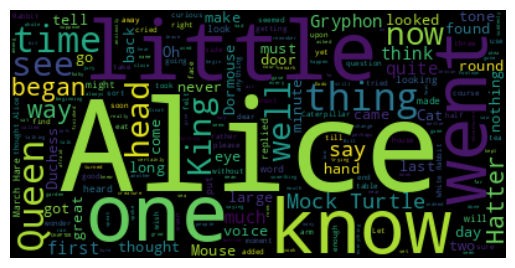

In [73]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
# resize the cloud so that we can see the less frequent words a little better.

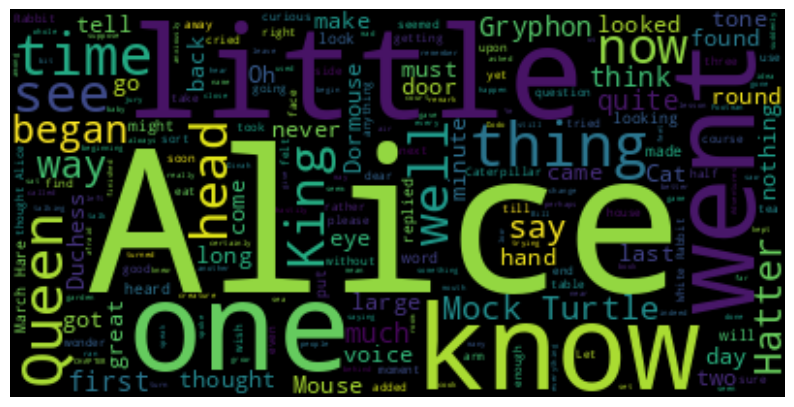

In [74]:
fig = plt.figure(figsize=(10, 12))

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Much better! However, said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

In [52]:
stopwords.add('said') 

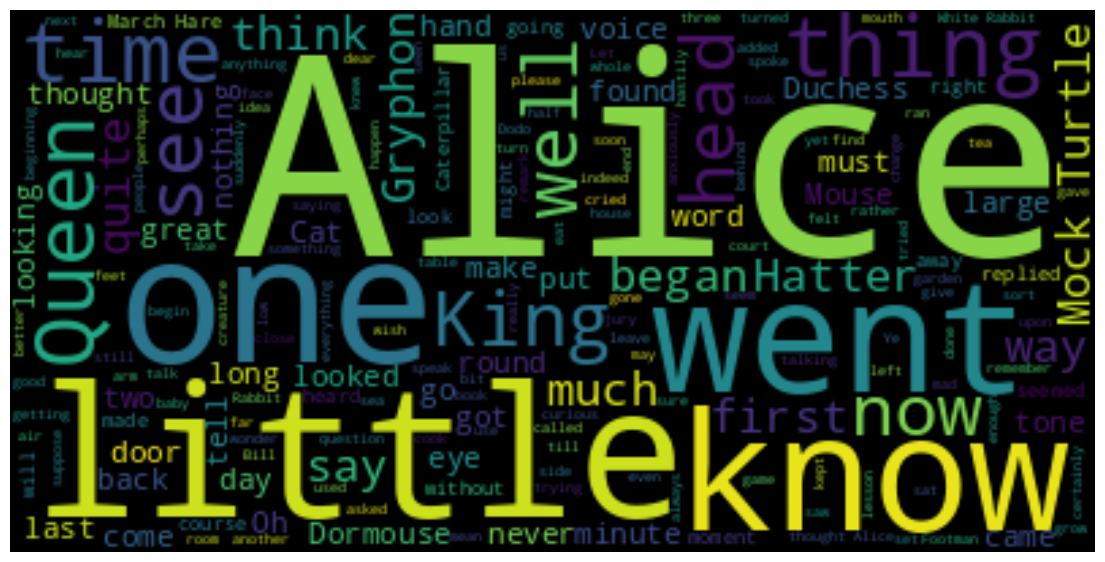

In [75]:
# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
import numpy as np 
from PIL import Image

alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

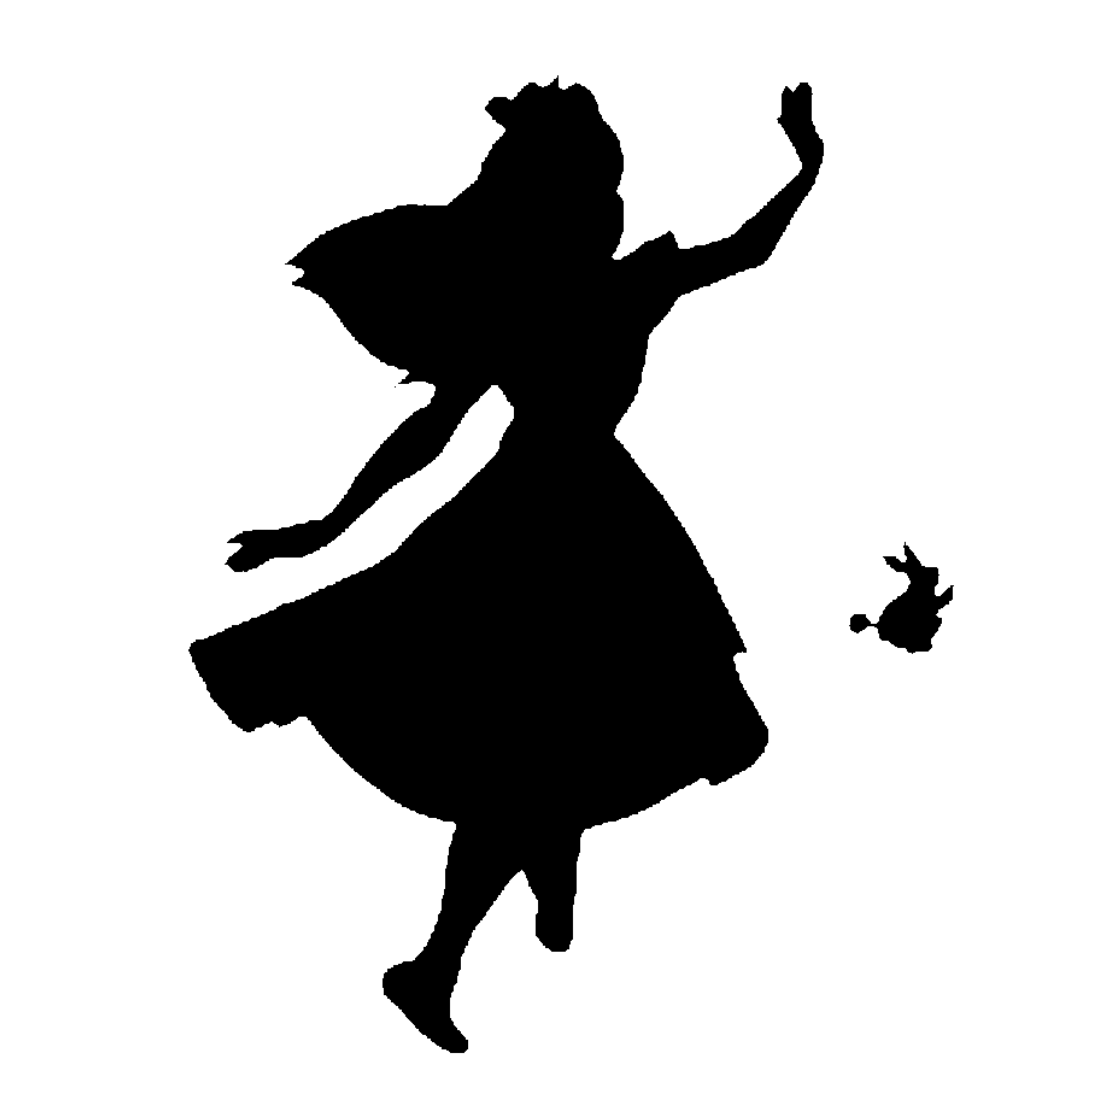

In [48]:
# Take a look at how the mask looks like

fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

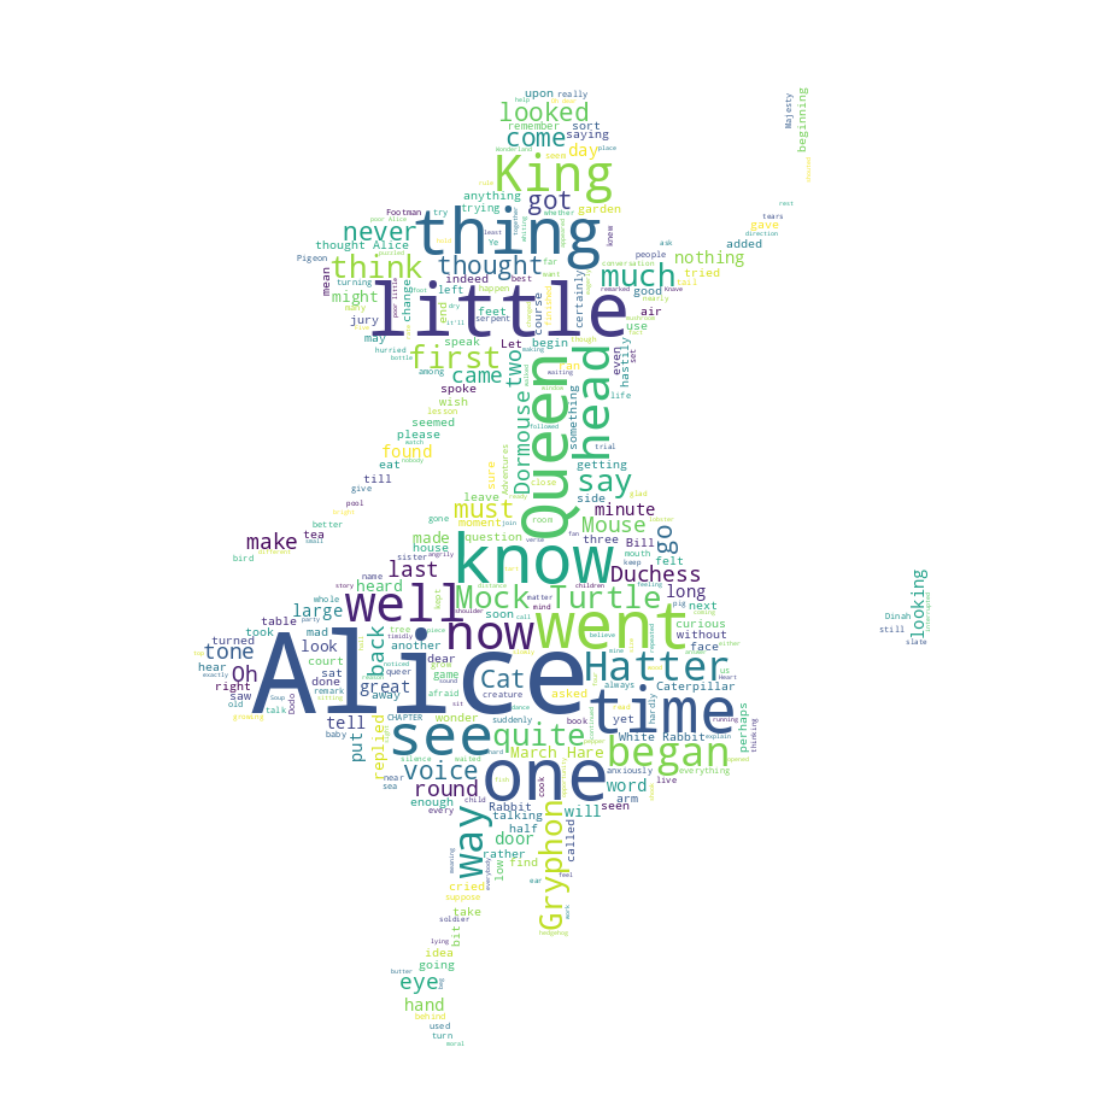

In [66]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
df_can=df_canada.groupby('Country').sum()
total_immigration = df_can['Total'].sum()

max_words = 90
word_string = ''
for country in df_can.index.values:
     # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [61]:
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


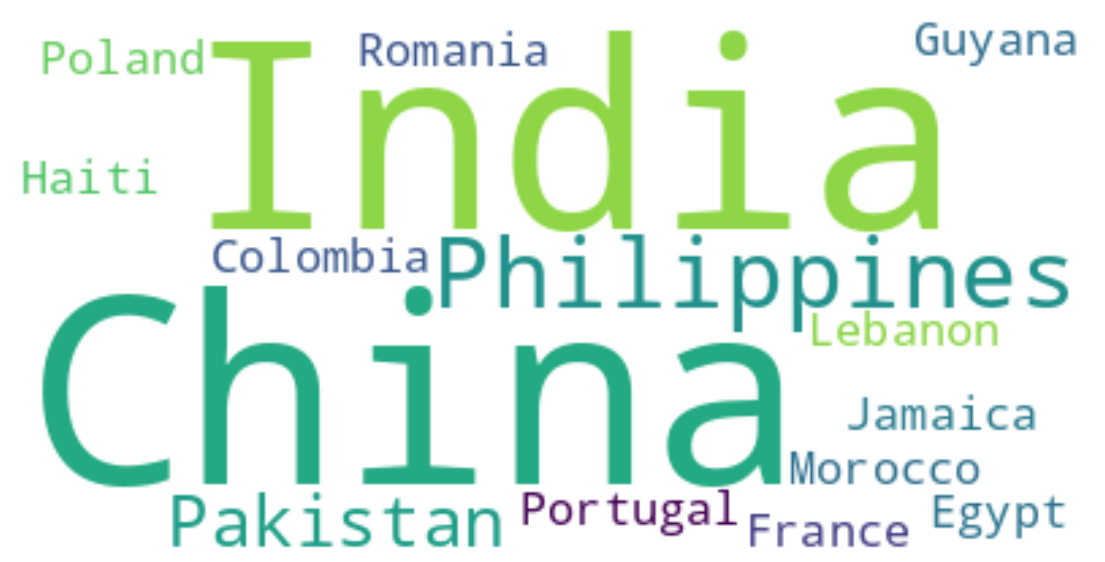

In [62]:
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plotting with Seaborn

In [77]:
import seaborn as sns

**Countplot**

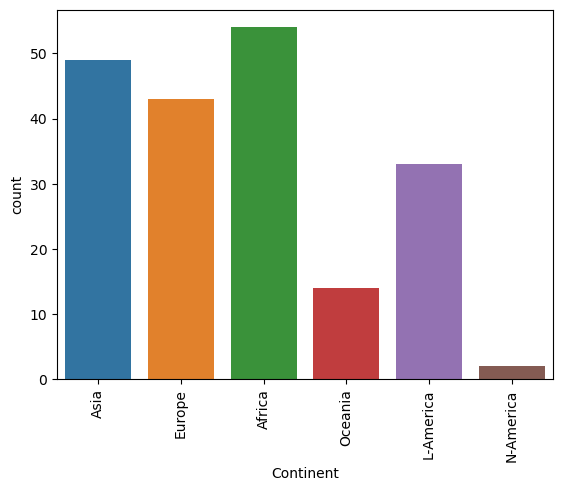

In [82]:
df_can1 = df_canada.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northern America', 'N-America')

sns.countplot(x='Continent', data=df_can1)

plt.xticks(rotation='vertical')
plt.show()

**Barplot**

<Axes: xlabel='Continent', ylabel='Total'>

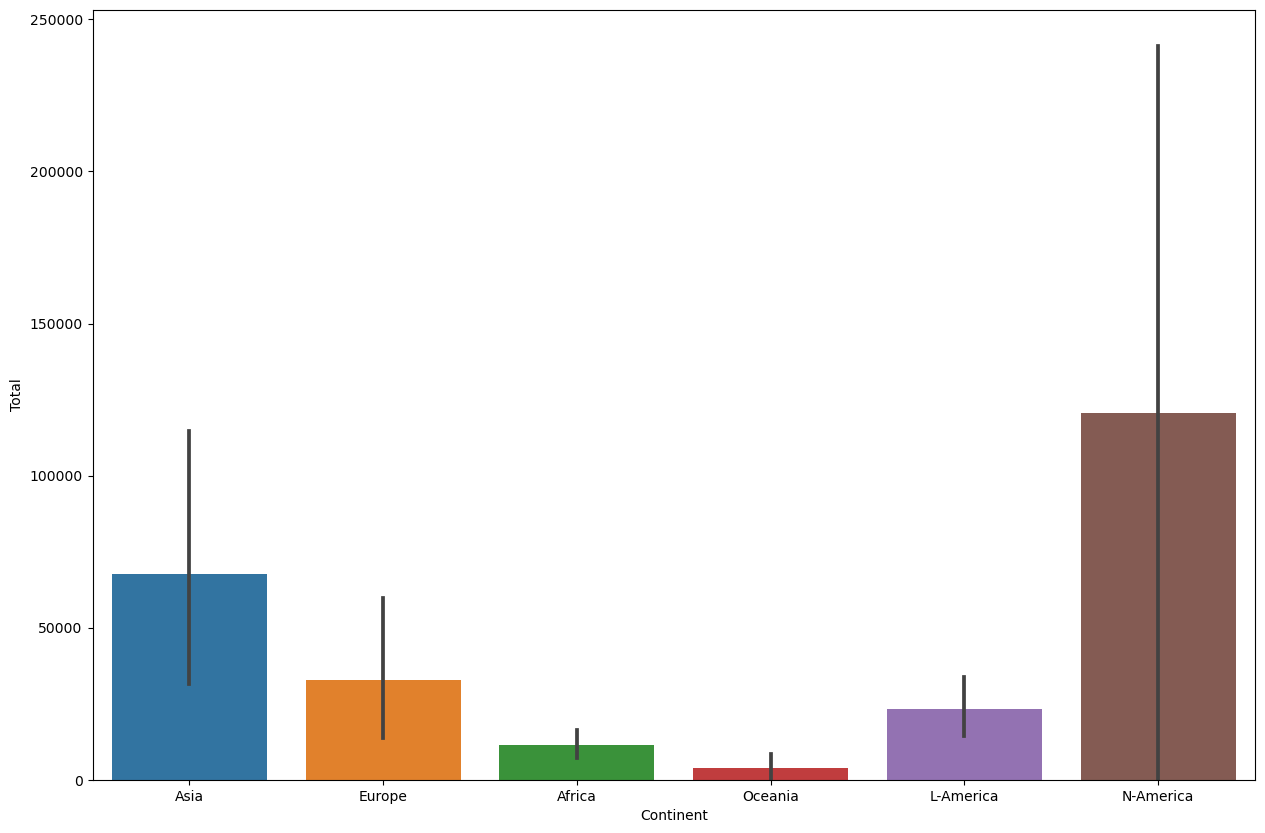

In [90]:
plt.figure(figsize=(15,10))

sns.barplot(x='Continent', y='Total', data=df_can1)

In [91]:
# verify

df_can1.groupby('Continent')['Total'].mean()

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

**Regression Plots**

In [122]:
df_tot = df_canada.loc[:, map(str, range(1980,2014))].transpose()
df_tot.head()

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114
1982,39,0,71,0,0,6,0,626,0,484,...,9074,146,0,0,174,2162,0,1,11,102
1983,47,0,69,0,0,6,0,241,0,317,...,7100,105,0,0,124,3404,0,6,7,44
1984,71,0,63,0,0,4,42,237,0,317,...,6661,90,0,0,142,7583,0,0,16,32


In [123]:
df_tot['Total'] = df_tot.apply(lambda x: sum([i for i in x if isinstance(i, (int,float))]), axis=1)

In [124]:
df_tot.head()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,Total
1980,16,1,80,0,0,1,0,368,0,702,...,128,0,0,103,1191,0,1,11,72,99137
1981,39,0,67,1,0,3,0,426,0,639,...,132,0,0,117,1829,0,2,17,114,110563
1982,39,0,71,0,0,6,0,626,0,484,...,146,0,0,174,2162,0,1,11,102,104271
1983,47,0,69,0,0,6,0,241,0,317,...,105,0,0,124,3404,0,6,7,44,75550
1984,71,0,63,0,0,4,42,237,0,317,...,90,0,0,142,7583,0,0,16,32,73417


In [125]:
df_tot.reset_index(inplace=True)

In [130]:
df_tot = df_tot[['index', 'Total']]
df_tot.rename(columns={'index':'Years'}, inplace=True)
df_tot.head()

,Years,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


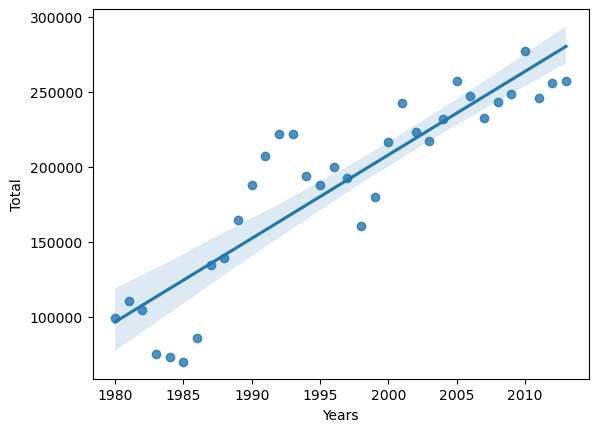

In [135]:
df_tot['Years'] = pd.to_numeric(df_tot['Years'], errors='coerce')
df_tot['Total'] = pd.to_numeric(df_tot['Total'], errors='coerce')

ax = sns.regplot(x='Years', y='Total', data=df_tot)

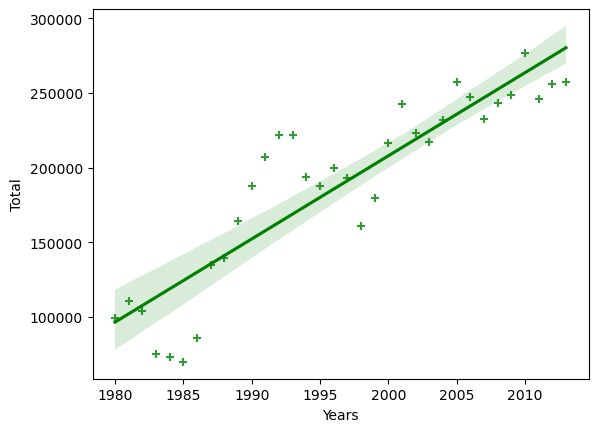

In [136]:
ax = sns.regplot(x='Years', y='Total', data=df_tot, color='green', marker='+')